In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston=load_boston()

In [3]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
dataset=boston.data

In [6]:
for name, index in enumerate(boston.feature_names): #attributes
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [7]:
dataset[0:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [8]:
ds=dataset[0:3,12] #checking 12th column

In [9]:
ds

array([4.98, 9.14, 4.03])

In [10]:
data=dataset[:,12].reshape(-1,1) #reshaping(one column) a column B

In [11]:
data[0:3,:]

array([[4.98],
       [9.14],
       [4.03]])

In [12]:
np.shape(dataset) #shape of dataset

(506, 13)

In [13]:
tb=boston.target

In [14]:
tb[0:3]

array([24. , 21.6, 34.7])

In [15]:
target=boston.target.reshape(-1,1) #target or output value

In [16]:

target[0:3]

array([[24. ],
       [21.6],
       [34.7]])

In [17]:
np.shape(target) #shape of output values 

(506, 1)

In [18]:
np.shape(data)

(506, 1)

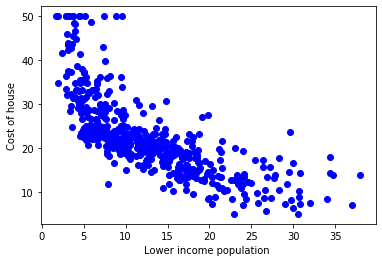

In [19]:
%matplotlib inline 
plt.scatter(data,target,color='blue')
plt.xlabel('Lower income population ')
plt.ylabel('Cost of house')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
reg=LinearRegression()#creating model
reg.fit(data,target)#fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
pred=reg.predict(data) #prediction

In [22]:
pred[0:3]

array([[29.8225951 ],
       [25.87038979],
       [30.72514198]])

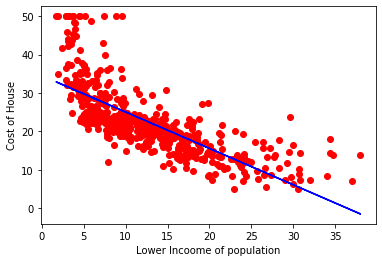

In [23]:
%matplotlib inline 
plt.scatter(data,target,color='red')
plt.plot(data,pred,color='blue')
plt.xlabel('Lower Incoome of population')
plt.ylabel('Cost of House')
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures # fitting of the curve issue using polynomial model
from sklearn.pipeline import make_pipeline   #for merging the models

In [25]:
model=make_pipeline(PolynomialFeatures(10),reg) #creating pipeline with polynomialfeatures of any random number

In [26]:
model.fit(data,target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [27]:
pred1=model.predict(data)

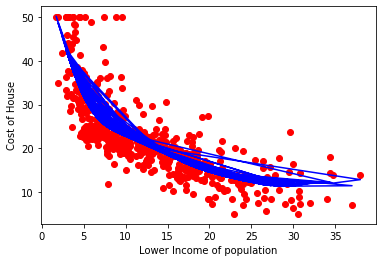

In [28]:
%matplotlib inline 
plt.scatter(data,target,color='red')
plt.plot(data,pred1,color='blue')
plt.xlabel('Lower Income of population')
plt.ylabel('Cost of House')
plt.show()

In [29]:
from sklearn.metrics import r2_score#r2(r square value ranges from -1 to 1 ) if it is 1 the model is fitted else not fitted  
r2_score(pred,target)#predicton without polynomial features

0.1622589284620234

In [30]:
r2_score(pred1,target) #prediction with model trained with polynomial features

0.5388797874712266

In [31]:
#MODEL: AVG NO.OF ROOMS VS COST OF HOUSE
x=dataset[:,5].reshape(-1,1)

y=boston.target.reshape(-1,1)
print(x[0:3],y[-5:-1])

[[6.575]
 [6.421]
 [7.185]] [[22.4]
 [20.6]
 [23.9]
 [22. ]]


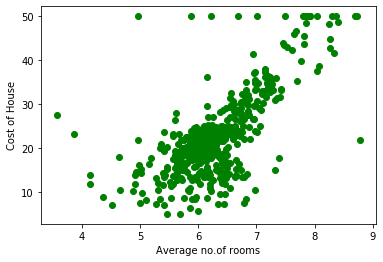

In [32]:
plt.scatter(x,y,color="green")
plt.xlabel('Average no.of rooms')
plt.ylabel('Cost of House')
plt.show()


In [33]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

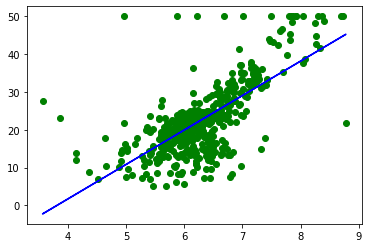

In [34]:
pred2=lr.predict(x)
plt.scatter(x,y,color="green")
plt.plot(x,pred2,color="blue")
plt.show()

In [35]:
r2_score(pred2,y)

-0.06814344024510333

In [46]:
model1=make_pipeline(PolynomialFeatures(35),lr)

In [47]:
model1.fit(x,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=35, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [48]:
pred3=model1.predict(x)

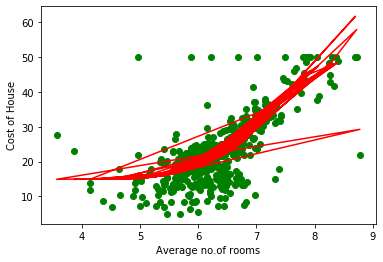

In [49]:
plt.scatter(x,y,color="green")
plt.plot(x,pred3,color="red")
plt.xlabel('Average no.of rooms')
plt.ylabel('Cost of House')
plt.show()


In [50]:
r2_score(pred3,y)

0.37715243861051506